In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = './num.csv'
df = pd.read_csv(file_path)
df.head()

,frame_number,frame,ID,center_x,center_y,v_x,v_y,a_x,a_y,lane,...,preceding_distance,right_preceding_distance,left_preceding_distance,following_distance,right_following_distance,left_following_distance,LC,sequence_ID,center_x_ma,center_y_ma
0,1,0.27,42,1291.42,538.71,0.00,0.00,0.0,0.00,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1285.662,538.462
1,2,0.30,42,1288.97,538.55,-22.69,-1.48,0.0,0.00,1,...,NaN,NaN,34.752634,NaN,NaN,NaN,1,1,1285.662,538.462
2,3,0.33,42,1285.80,538.44,-29.35,-1.02,-222.0,15.33,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1285.662,538.462
3,4,0.37,42,1282.64,538.32,-29.26,-1.11,3.0,-3.00,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1285.662,538.462
4,5,0.40,42,1279.48,538.29,-29.26,-0.28,0.0,27.67,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1285.662,538.462


In [3]:
# LC가 0인 데이터와 1인 데이터를 나눕니다.
lc_0 = df[df['LC'] == 0]
lc_1 = df[df['LC'] == 1]

# LC가 0인 경우 sequence_ID 별로 frame_number 개수를 계산합니다.
frame_count_lc_0 = lc_0.groupby('sequence_ID')['frame_number'].count().reset_index(name='frame_count')

# LC가 1인 경우 sequence_ID 별로 frame_number 개수를 계산합니다.
frame_count_lc_1 = lc_1.groupby('sequence_ID')['frame_number'].count().reset_index(name='frame_count')

# 결과를 각각 출력합니다.
print("LC가 0인 경우의 frame count:")
print(frame_count_lc_0.head(10))

print("\nLC가 1인 경우의 frame count:")
print(frame_count_lc_1.head(10))

LC가 0인 경우의 frame count:
   sequence_ID  frame_count
0           99          298
1          100          300
2          101          300
3          102          300
4          103          297
5          104          283
6          105          290
7          106          300
8          107          300
9          108          599

LC가 1인 경우의 frame count:
   sequence_ID  frame_count
0            1          285
1            2          299
2            3          291
3            4          258
4            5          292
5            6          299
6            7          282
7            8          297
8            9          177
9           10          300


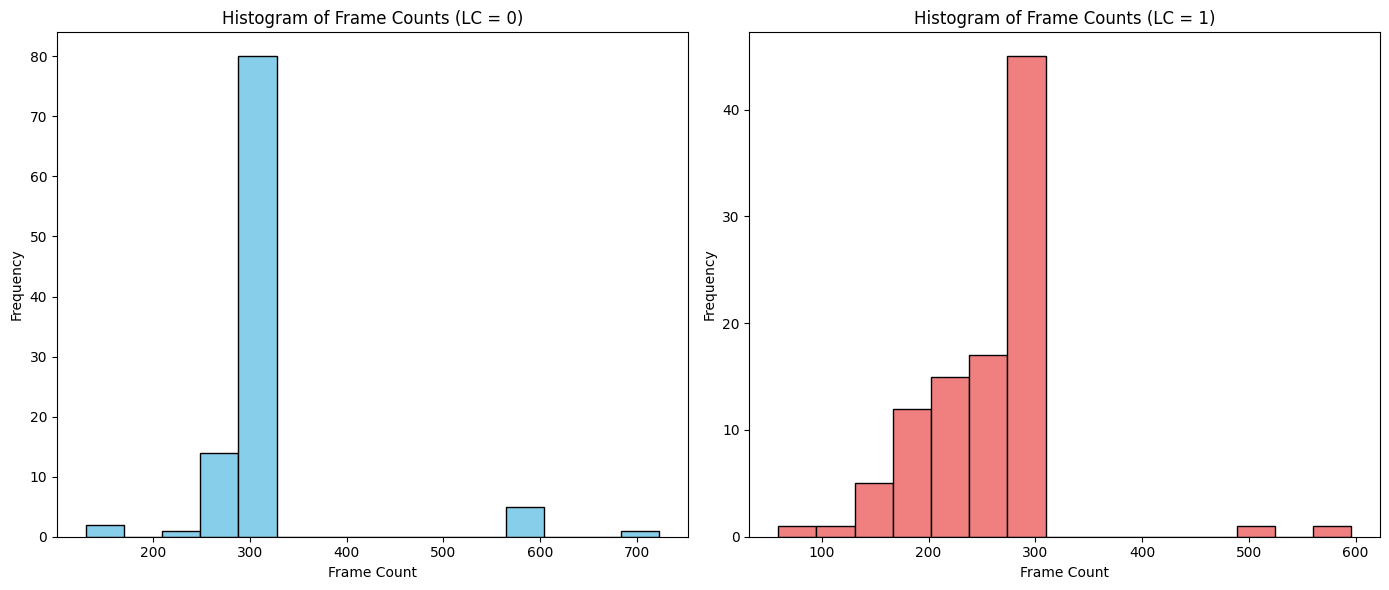

In [4]:
# 히스토그램으로 시각화
plt.figure(figsize=(14, 6))

# LC가 0인 경우
plt.subplot(1, 2, 1)
plt.hist(frame_count_lc_0['frame_count'], bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram of Frame Counts (LC = 0)')
plt.xlabel('Frame Count')
plt.ylabel('Frequency')

# LC가 1인 경우
plt.subplot(1, 2, 2)
plt.hist(frame_count_lc_1['frame_count'], bins=15, color='lightcoral', edgecolor='black')
plt.title('Histogram of Frame Counts (LC = 1)')
plt.xlabel('Frame Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

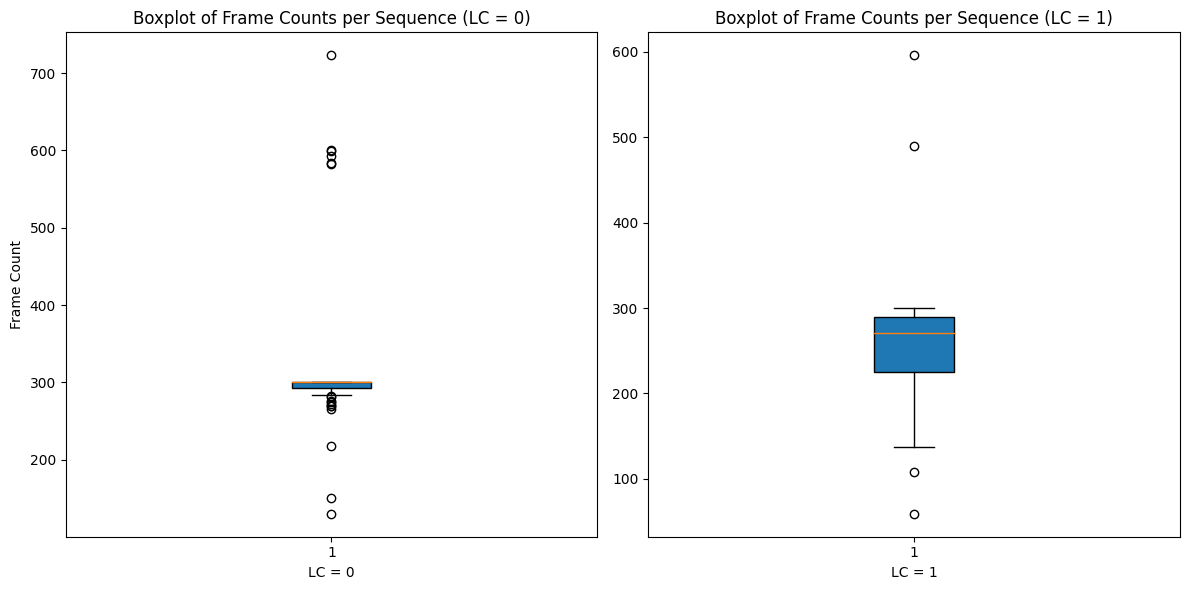

In [5]:
# sequence_ID별로 frame_number의 개수를 계산합니다.
frame_counts_lc_0 = lc_0.groupby('sequence_ID')['frame_number'].count()
frame_counts_lc_1 = lc_1.groupby('sequence_ID')['frame_number'].count()

# 박스플롯 생성
plt.figure(figsize=(12, 6))

# LC가 0인 경우의 박스 플롯
plt.subplot(1, 2, 1)
plt.boxplot(frame_counts_lc_0, vert=True, patch_artist=True)
plt.title('Boxplot of Frame Counts per Sequence (LC = 0)')
plt.xlabel('LC = 0')
plt.ylabel('Frame Count')

# LC가 1인 경우의 박스 플롯
plt.subplot(1, 2, 2)
plt.boxplot(frame_counts_lc_1, vert=True, patch_artist=True)
plt.title('Boxplot of Frame Counts per Sequence (LC = 1)')
plt.xlabel('LC = 1')

plt.tight_layout()
plt.show()

In [6]:
def find_lower_outliers(data):
    # IQR 계산
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    
    # 하한 경계값 설정
    lower_bound = q1 - 1.5 * iqr
    
    # 하한보다 작은 이상치 추출
    outliers = data[data < lower_bound]
    
    return outliers

# LC가 0인 경우 하한 이상치 찾기
lower_outliers_lc_0 = find_lower_outliers(frame_counts_lc_0)

# LC가 1인 경우 하한 이상치 찾기
lower_outliers_lc_1 = find_lower_outliers(frame_counts_lc_1)

# 결과 출력
outlier_results = {
    'LC_0_lower_outliers': {
        'count': len(lower_outliers_lc_0),
        'sequence_IDs': lower_outliers_lc_0.index.tolist(),
        'frame_counts': lower_outliers_lc_0.tolist()
    },
    'LC_1_lower_outliers': {
        'count': len(lower_outliers_lc_1),
        'sequence_IDs': lower_outliers_lc_1.index.tolist(),
        'frame_counts': lower_outliers_lc_1.tolist()
    }
}

# 결과 출력
print("LC = 0 하한 이상치:", outlier_results['LC_0_lower_outliers'])
print("LC = 1 하한 이상치:", outlier_results['LC_1_lower_outliers'])

LC = 0 하한 이상치: {'count': 11, 'sequence_IDs': [109, 115, 123, 127, 130, 155, 161, 190, 196, 197, 201], 'frame_counts': [275, 270, 269, 272, 150, 218, 282, 281, 130, 276, 266]}
LC = 1 하한 이상치: {'count': 2, 'sequence_IDs': [12, 30], 'frame_counts': [59, 108]}


In [7]:
# frame_count가 ~보다 작은 sequence_ID 필터링
ids_lc_0_under_150 = frame_count_lc_0[frame_count_lc_0['frame_count'] < 150]
ids_lc_1_under_150 = frame_count_lc_1[frame_count_lc_1['frame_count'] < 150]

# 결과 출력
num_ids_lc_0_under_150 = len(ids_lc_0_under_150)
num_ids_lc_1_under_150 = len(ids_lc_1_under_150)

print(f"LC가 0인 경우, frame_count가 150보다 작은 sequence_ID 개수: {num_ids_lc_0_under_150}")
print("해당 sequence_ID:", ids_lc_0_under_150['sequence_ID'].tolist())

print(f"\nLC가 1인 경우, frame_count가 150보다 작은 sequence_ID 개수: {num_ids_lc_1_under_150}")
print("해당 sequence_ID:", ids_lc_1_under_150['sequence_ID'].tolist())

LC가 0인 경우, frame_count가 150보다 작은 sequence_ID 개수: 1
해당 sequence_ID: [196]

LC가 1인 경우, frame_count가 150보다 작은 sequence_ID 개수: 5
해당 sequence_ID: [12, 30, 33, 55, 97]


In [8]:
# 각 sequence_ID별로 그룹화하여 lane 변경 지점 찾기
results = []

for sequence_id, group in lc_1.groupby('sequence_ID'):
    group = group.sort_values('frame_number')
    
    lane_changes = group['lane'].ne(group['lane'].shift()).cumsum()
    lane_change_indices = group.index[lane_changes.diff().fillna(0) != 0].tolist()
    
    lane_change_frames = group.loc[lane_change_indices, 'frame_number'].tolist()
    
    results.append({
        'sequence_ID': sequence_id,
        'frame_count': len(group),
        'lane_change_frames': lane_change_frames
    })

results_df = pd.DataFrame(results)

results_df

,sequence_ID,frame_count,lane_change_frames
0,1,285,[145]
1,2,299,[161]
2,3,291,[158]
3,4,258,[119]
4,5,292,[12]
...,...,...,...
93,94,201,[103]
94,95,263,[122]
95,96,298,[151]
96,97,137,[29]


In [10]:
def analyze_sequence(sequence_id):
    # 지정한 sequence_ID에 해당하는 데이터만 선택
    group = lc_1[lc_1['sequence_ID'] == sequence_id]
    
    if group.empty:
        print(f"sequence_ID {sequence_id}에 대한 데이터가 없습니다.")
        return
    
    # frame_number 순으로 정렬
    group = group.sort_values('frame_number')
    
    # lane 변경 지점 찾기
    lane_changes = group['lane'].ne(group['lane'].shift()).cumsum()
    lane_change_indices = group.index[lane_changes.diff().fillna(0) != 0].tolist()
    
    # 각 lane 변경 지점의 frame_number
    lane_change_frames = group.loc[lane_change_indices, 'frame_number'].tolist()
    
    # 결과 출력
    result = {
        'sequence_ID': sequence_id,
        'frame_count': len(group),
        'lane_change_frames': lane_change_frames
    }
    
    print(result)

analyze_sequence(71)


# LC가 0인 경우, frame_count가 150보다 작은 sequence_ID 개수: 1
# 해당 sequence_ID: [196]

# LC가 1인 경우, frame_count가 150보다 작은 sequence_ID 개수: 5
# 해당 sequence_ID: [12, 30, 33, 55, 97]

{'sequence_ID': 71, 'frame_count': 232, 'lane_change_frames': [121]}
